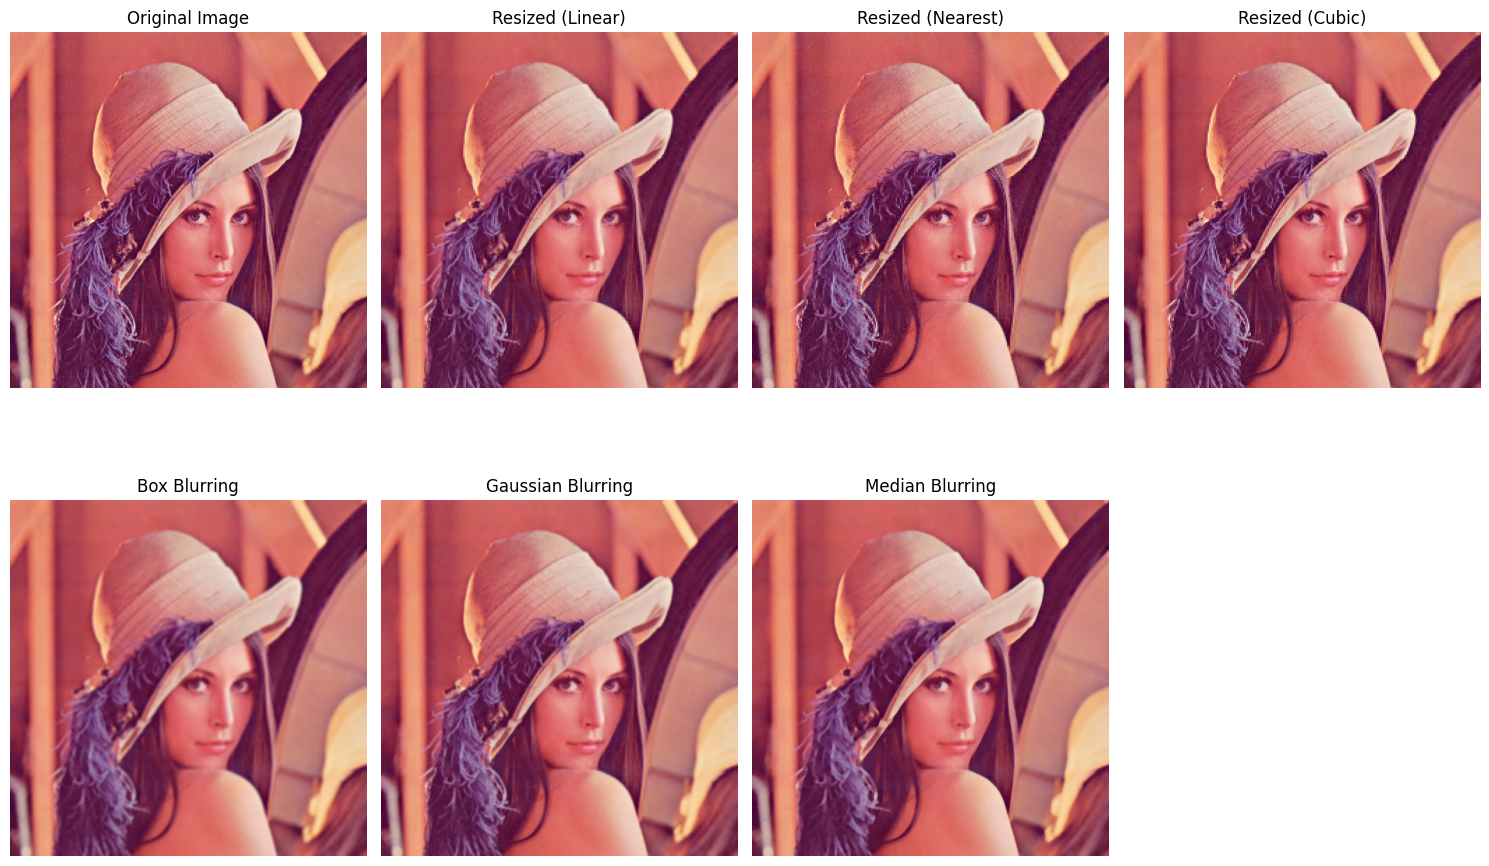

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "Lena_Image.png"
lena_image = cv2.imread(image_path)

if lena_image is None:
    print("Image not found. Please check the file path.")
else:
    lena_image = cv2.cvtColor(lena_image, cv2.COLOR_BGR2RGB)

    scale_percent = 50
    width = int(lena_image.shape[1] * scale_percent / 100)
    height = int(lena_image.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized_linear = cv2.resize(lena_image, dim, interpolation=cv2.INTER_LINEAR)
    resized_nearest = cv2.resize(lena_image, dim, interpolation=cv2.INTER_NEAREST)
    resized_cubic = cv2.resize(lena_image, dim, interpolation=cv2.INTER_CUBIC)

    blurred_box = cv2.blur(lena_image, (5, 5))
    blurred_gaussian = cv2.GaussianBlur(lena_image, (5, 5), 0)
    blurred_median = cv2.medianBlur(lena_image, 5)

    titles = [
        "Original Image", "Resized (Linear)", "Resized (Nearest)", "Resized (Cubic)",
        "Box Blurring", "Gaussian Blurring", "Median Blurring"
    ]
    images = [
        lena_image, resized_linear, resized_nearest, resized_cubic,
        blurred_box, blurred_gaussian, blurred_median
    ]

    plt.figure(figsize=(15, 10))
    for i in range(7):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()



Model: Support Vector Machine (SVM)
Cross-Validation Accuracy (mean ± std): 0.9882 ± 0.0036
Accuracy: 0.9917, Precision: 0.9920, Recall: 0.9917, F1-Score: 0.9917, AUC: 0.9999

Model: Random Forest
Cross-Validation Accuracy (mean ± std): 0.9729 ± 0.0081
Accuracy: 0.9611, Precision: 0.9620, Recall: 0.9611, F1-Score: 0.9609, AUC: 0.9992


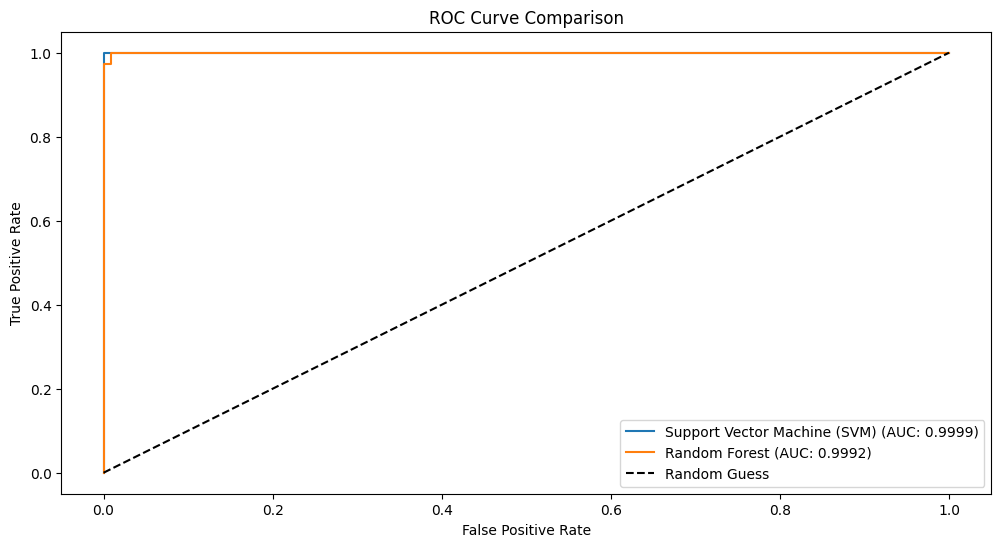

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target
y_binarized = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_binarized[y_test], y_prob, multi_class="ovr")
    fpr, tpr, _ = roc_curve(y_binarized[y_test][:, 0], y_prob[:, 0])
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "AUC": auc_score,
        "FPR": fpr,
        "TPR": tpr
    }
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    print(f"Cross-Validation Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc_score:.4f}")

plt.figure(figsize=(12, 6))
for model_name, result in results.items():
    plt.plot(result["FPR"], result["TPR"], label=f"{model_name} (AUC: {result['AUC']:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
